In [1]:
import matplotlib.pyplot as plt
import numpy as np
import parameters 
import device 
import network
import numpy as np

/home/ddallo/.local/lib/python3.8/site-packages/samna
finished bindings


In [2]:
# open DYNAP-SE1 board to get Dynapse1Model
dynapse = device.DynapseDevice(sender_port=12321, receiver_port=12322)
model = dynapse.model

[0]:  Bus 3 Device 20 Dynapse1DevKit serial_number 00000027
[1]:  Bus 1 Device 88 Dynapse1DevKit serial_number 00000032
[2]:  Bus 1 Device 31 Dynapse1DevKit serial_number 00000000
[3]:  Bus 1 Device 85 Dynapse1DevKit serial_number 00000011
[4]:  Bus 1 Device 84 Dynapse1DevKit serial_number 00000007
[5]:  Bus 1 Device 34 Dynapse1DevKit serial_number 00000020
[6]:  Bus 1 Device 87 Dynapse1DevKit serial_number 00000033
Sender port: tcp://0.0.0.0:12321
Receiver port: tcp://0.0.0.0:12322
Opened device name: my_dynapse1
SamnaNode ID: 1
PythonNode ID: 2


In [24]:
# dynapse.monitor_all_neurons()
dynapse.monitor_neurons(0,0,list(range(1,10)))

In [46]:
parameters.set_param(model, parameters.NEURON_DC_INPUT, (2,50), 0, 0)

16078.0

In [47]:
dynapse.start_graph()

In [48]:
dynapse.sink_node.get_buf()

[]

In [49]:
dynapse.run_simulation(1)

[]

In [42]:
net = network.DynapseNetworkGenerator()
model.apply_configuration(net.get_config())


Checking if the given network is valid to be deployed on DYNAP-SE1 chips...
Validation complete: the network is good to go!
Converted the validated network to a Dynapse1 configuration!


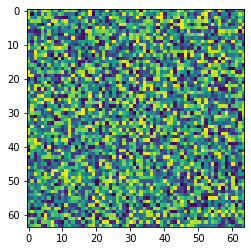

In [15]:
import time
from IPython.display import clear_output

for i in range(100):
    plt.imshow(np.random.random((64,64)))
    plt.show()
    # time.sleep(0.1)
    clear_output(wait=True)

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML

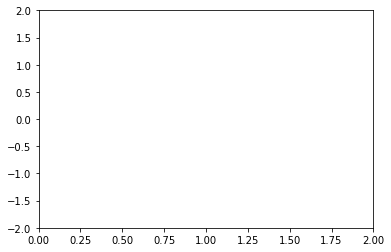

In [7]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [8]:
HTML(anim.to_jshtml())

In [50]:
dynapse.close()